# Temp Regression

* Brendan Reed
* Project repository: https://github.com/reedbc1/datafun-07-ml-predictive

Importing required packages:

In [59]:
import numpy as np
import pandas as pd

## Part 1 - Linear Regression

### Section 1 - Load

In [60]:
nyc = pd.read_csv(r'C:\Users\reedb\Documents\NW University\datafun-07-ml-predictive\ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - View

In [61]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [62]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Clean

In [63]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [64]:
nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [65]:
nyc.Date = nyc.Date.floordiv(100)

In [66]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Describe

In [67]:
pd.set_option('display.precision', 2)

In [68]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Calculate Line

In [69]:
from scipy import stats

In [70]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [71]:
print(f'slope: {linear_regression.slope}')
print(f'intercept: {linear_regression.intercept}')

slope: 0.014771361132966163
intercept: 8.694993233674289


### Section 6 - Predict

Predicting the "average high temp in Jan" for the year 2026:

In [72]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

### Section 7 - Plot

(10.0, 70.0)

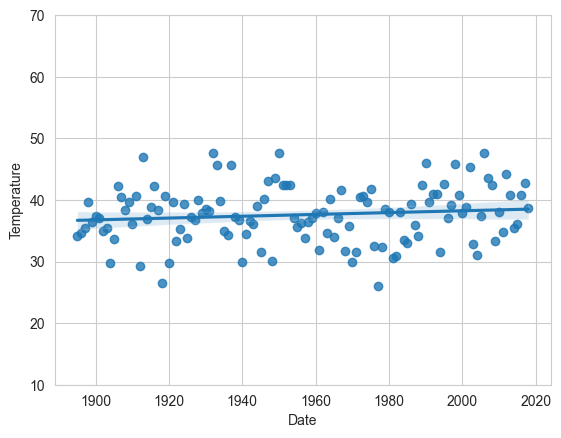

In [73]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10, 70)

## Part 2 - Machine Learning

### Splitting the Data for Training and Testing

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [76]:
X_train.shape

(93, 1)

In [77]:
X_test.shape

(31, 1)

### Training the Model

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
linear_regression = LinearRegression()

In [80]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [81]:
linear_regression.coef_

array([0.01939167])

In [82]:
linear_regression.intercept_

-0.30779820252656975

### Testing the Model

In [83]:
predicted = linear_regression.predict(X_test)

In [84]:
expected = y_test

In [85]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predicting Future Temperatures and Estimating Past Temperatures 

In [86]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [87]:
predict(2019)

array([38.84399018])

In [88]:
predict(1890)

array([36.34246432])

In [89]:
predict(2026)

array([38.97973189])

### Visualizing the Dataset with the Regression Line

In [90]:
import seaborn as sns

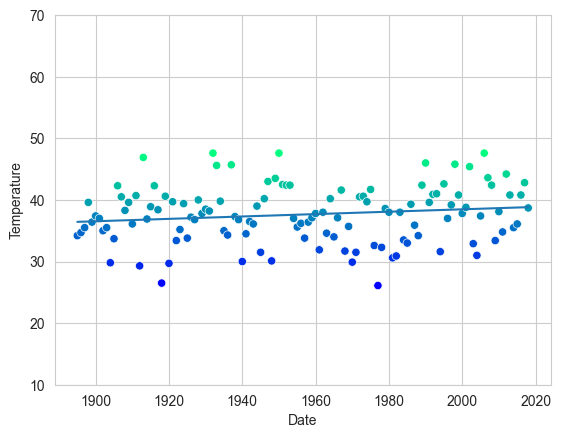

In [91]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

### Difference between methods

Two methods were used to perform simple linear regression: scipy.stats.linregress and sklearn.linear_model.LinearRegression.

The first method, scipy.stats.linregress, performs linear least-squares regression on the data. It finds the slope and intercept of a line that minimizes the sum of squares of the observations.

The second method, sklearn.linear_model.LinearRegression, does the same thing, but we also used train_test_split to train the regression model on 75% of the data (X_train and  y_train). The remaining 25% of the data was used to test our model to see how closely it can predict the observations (X_test and y_test).



## Part 3: Bonus